In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\ThikPad\\Documents\\py\\MBA.csv')

In [3]:
data['admission'] = data['admission'].fillna('Reject')


In [ ]:
data['admission'] = data['admission'].apply(lambda x: 1 if x == 'Admit' else (2 if x == 'Waitlist' else 0))

data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['international'] = data['international'].apply(lambda x: 1 if x == True else 0)


In [5]:
data['race'] = data['race'].fillna('Unknown')


In [6]:
data = pd.get_dummies(data, columns=['major', 'race', 'work_industry'])

In [8]:
X = data.drop(['application_id', 'admission'], axis=1)
y = data['admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
y_pred = dt_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Reject', 'Admit', 'Waitlist']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Reject       0.83      0.98      0.90      1525
       Admit       0.53      0.09      0.16       299
    Waitlist       0.00      0.00      0.00        35

    accuracy                           0.82      1859
   macro avg       0.45      0.36      0.35      1859
weighted avg       0.77      0.82      0.76      1859


Confusion Matrix:
[[1499   23    3]
 [ 270   28    1]
 [  33    2    0]]

Accuracy Score: 0.8214093598708984


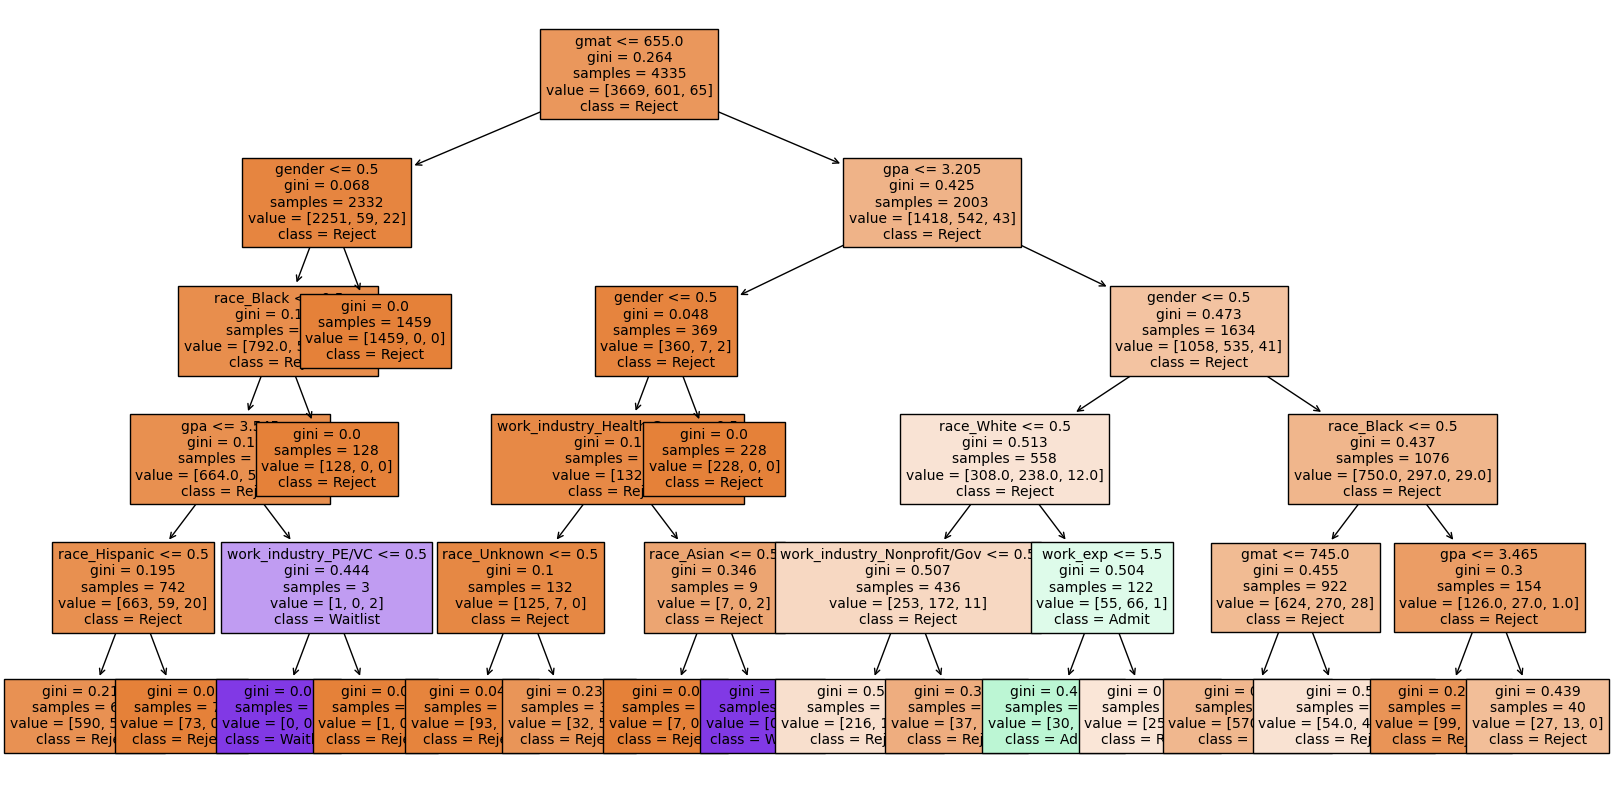

In [20]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Reject', 'Admit', 'Waitlist'], fontsize=10)
plt.show()

In [21]:
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- gmat <= 655.00
|   |--- gender <= 0.50
|   |   |--- race_Black <= 0.50
|   |   |   |--- gpa <= 3.54
|   |   |   |   |--- race_Hispanic <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- race_Hispanic >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- gpa >  3.54
|   |   |   |   |--- work_industry_PE/VC <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- work_industry_PE/VC >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- race_Black >  0.50
|   |   |   |--- class: 0
|   |--- gender >  0.50
|   |   |--- class: 0
|--- gmat >  655.00
|   |--- gpa <= 3.21
|   |   |--- gender <= 0.50
|   |   |   |--- work_industry_Health Care <= 0.50
|   |   |   |   |--- race_Unknown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- race_Unknown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- work_industry_Health Care >  0.50
|   |   |   |   |--- race_Asian <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ra